In [71]:
import helpers.ansatz as torch_ansatz
import helpers.ansatz_JAX as jax_ansatz

import torch
import numpy as np
import jax.numpy as jnp
import matplotlib.pyplot as plt
import math

from rikabplotlib.plot_utils import newplot

/tmp/ipykernel_4867/1797558551.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-beta * t))
/tmp/ipykernel_4867/1797558551.py:57: RuntimeWarning: overflow encountered in exp
  exp_ratios = np.exp(alpha * sigmoid(ts - 1, beta = 10) / sigmoid(ts - 2, beta = 10))


(0.0, 0.30000000000000004)

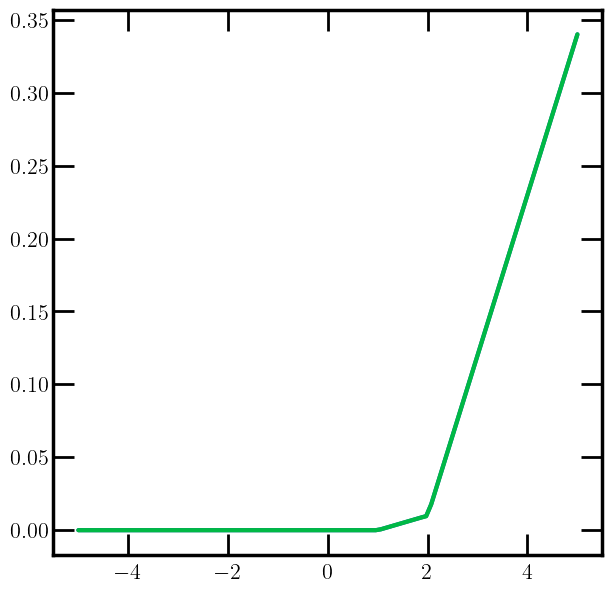

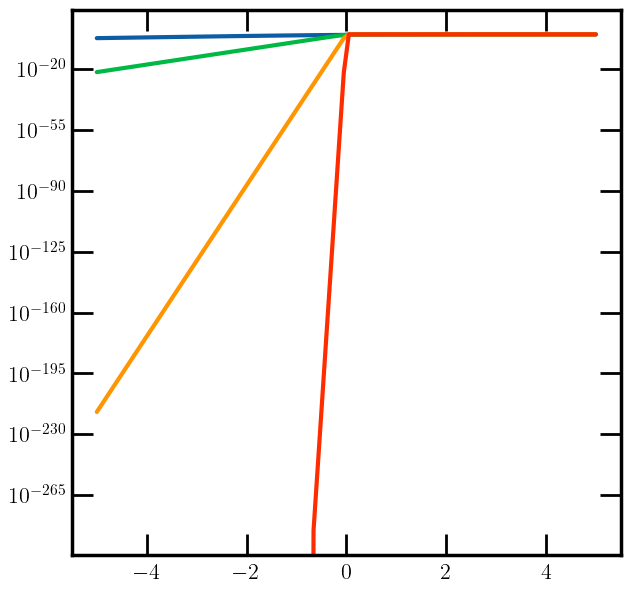

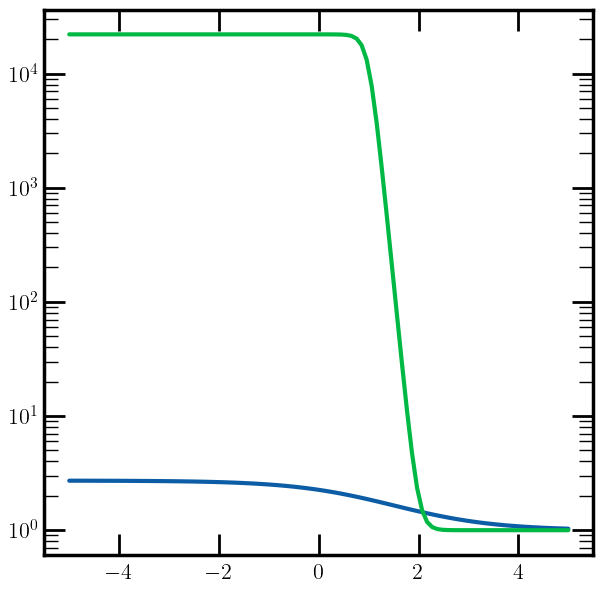

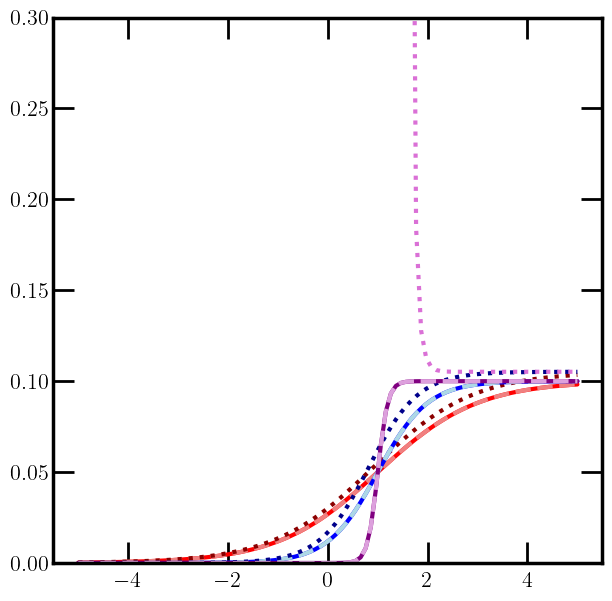

In [72]:
alpha = 0.1

def Theta(t):

    return np.where(t < 0, 0, 1)

def sigmoid(t, beta = 100):

    return 1 / (1 + np.exp(-beta * t))

def f(t):

    return alpha * (t-2) * Theta(t - 2) + alpha**2 * (t-1) * Theta(t - 1) 

def f_alt(t):

    return alpha * (t-2) * sigmoid(t - 2) + alpha**2 * (t-1) * sigmoid(t - 1)

ts = np.linspace(-5, 5, 100)

fig, ax = newplot("full")
ax.plot(ts, f(ts), label=r"$f(t)$")
ax.plot(ts, f_alt(ts), label=r"$f_{alt}(t)$")


fig, ax = newplot("full")
ax.plot(ts, sigmoid(ts, beta = 1), label=r"$\sigma(t)$")
ax.plot(ts, sigmoid(ts, beta = 10), label=r"$\sigma(t)$")
ax.plot(ts, sigmoid(ts, beta = 100), label=r"$\sigma(t)$")
ax.plot(ts, sigmoid(ts, beta = 1000), label=r"$\sigma(t)$")
plt.yscale("log")


fig, ax = newplot("full")
ax.plot(ts, sigmoid(ts - 1, beta = 1) / sigmoid(ts - 2, beta = 1), label=r"$\beta = 1$")
ax.plot(ts, sigmoid(ts - 1, beta = 10) / sigmoid(ts - 2, beta = 10), label=r"$\beta = 10$")
# ax.plot(ts, sigmoid(ts - 1, beta = 100) / sigmoid(ts - 2, beta = 100), label=r"$\beta = 100$")
# ax.plot(ts, sigmoid(ts - 1, beta = 1000) / sigmoid(ts - 2, beta = 1000), label=r"$\beta = 1000$")
plt.yscale("log")


fig, ax = newplot("full")
ratios = alpha * (sigmoid(ts - 1, beta = 1) / sigmoid(ts - 2, beta = 1))
exp_ratios = np.exp(alpha * sigmoid(ts - 1, beta = 1) / sigmoid(ts - 2, beta = 1))
plt.plot(ts, alpha * sigmoid(ts - 1, beta = 1), label=r"$\beta = 1$", color = "red")
plt.plot(ts, ratios * sigmoid(ts - 2, beta = 1), label=r"$\beta = 1$", color = "lightcoral", linestyle = "dashed")
plt.plot(ts, exp_ratios * sigmoid(ts - 2, beta = 1) - sigmoid(ts - 2, beta = 1), label=r"$\beta = 1$", color = "darkred", linestyle = "dotted")
plt.axhline(np.exp(1) - 1, color = "black", linestyle = "dotted")

ratios = alpha * (sigmoid(ts - 1, beta = 2) / sigmoid(ts - 2, beta = 2))
exp_ratios = np.exp(alpha * sigmoid(ts - 1, beta = 2) / sigmoid(ts - 2, beta = 2))
plt.plot(ts, alpha * sigmoid(ts - 1, beta = 2), label=r"$\beta = 2$", color = "blue")
plt.plot(ts, ratios * sigmoid(ts - 2, beta = 2), label=r"$\beta = 2$", color = "lightblue", linestyle = "dashed")
plt.plot(ts, exp_ratios * sigmoid(ts - 2, beta = 2) - sigmoid(ts - 2, beta = 2), label=r"$\beta = 2$", color = "darkblue", linestyle = "dotted")

ratios = alpha * (sigmoid(ts - 1, beta = 10) / sigmoid(ts - 2, beta = 10))
exp_ratios = np.exp(alpha * sigmoid(ts - 1, beta = 10) / sigmoid(ts - 2, beta = 10))
plt.plot(ts, alpha * sigmoid(ts - 1, beta = 10), label=r"$\beta = 5$", color = "purple")
plt.plot(ts, ratios * sigmoid(ts - 2, beta = 10), label=r"$\beta = 5$", color = "plum", linestyle = "dashed")
plt.plot(ts, exp_ratios * sigmoid(ts - 2, beta = 10) - sigmoid(ts - 2, beta = 10), label=r"$\beta = 2$", color = "orchid", linestyle = "dotted")

plt.ylim(0, alpha * 3)
# ratios = np.exp(sigmoid(ts - 1, beta = 100) / sigmoid(ts - 2, beta = 100))
# plt.plot(ts, ratios * sigmoid(ts - 1, beta = 100), label=r"$\beta = 100$", color = "green")
# plt.plot(ts, sigmoid(ts - 2, beta = 100), label=r"$\beta = 100$", color = "lightgreen", linestyle = "dashed")
# ratios = np.exp(sigmoid(ts - 1, beta = 1000) / sigmoid(ts - 2, beta = 1000))
# plt.plot(ts, ratios * sigmoid(ts - 1, beta = 1000), label=r"$\beta = 1000$", color = "purple")
# plt.plot(ts, sigmoid(ts - 2, beta = 1000), label=r"$\beta = 1000$", color = "plum", linestyle = "dashed")
# plt.yscale("log")

/tmp/ipykernel_4867/3270485254.py:1: RuntimeWarning: overflow encountered in exp
  exp_ratios = np.exp(alpha * sigmoid(ts - 1, beta = 10) / sigmoid(ts - 2, beta = 10) ) * sigmoid(ts - 2, beta = 10)


(0.0, 2.0)

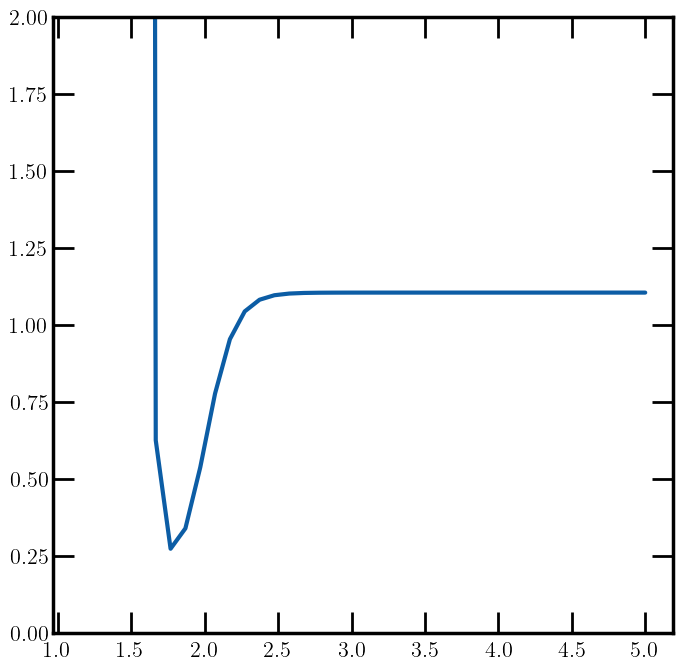

In [73]:
exp_ratios = np.exp(alpha * sigmoid(ts - 1, beta = 10) / sigmoid(ts - 2, beta = 10) ) * sigmoid(ts - 2, beta = 10)
plt.plot(ts, exp_ratios)
plt.ylim(0, 2)

In [74]:


rng = np.random.default_rng(seed=123)

mstar   = 0
max_M   = 4          # rows   (≥ 3 if you want α² terms)
max_N   = 5          # columns
B       = 6          # batch size  for t

alpha   = 0.37

t       = torch.tensor(rng.uniform(0.2, 4.0, size=(B,)), dtype=torch.float32)
t_jax   = jnp.asarray(np.array(t))

g_coeffs_np = rng.normal(scale=0.1, size=(max_M, max_N)).astype(np.float32)
theta_np    = rng.normal(scale=0.3, size=(max_M, 1   )).astype(np.float32)

g_coeffs_torch = torch.tensor(g_coeffs_np)
theta_torch    = torch.tensor(theta_np)
g_coeffs_jax   = jnp.asarray(g_coeffs_np)
theta_jax      = jnp.asarray(theta_np)

# ----- parameters for q -------------------------------------------------
t_min = 0.0
t_max = 6.0

factorial_cache_n_np = np.array([math.factorial(k) for k in range(max_N)],
                                dtype=np.float32)
factorial_cache_m_np = np.array([math.factorial(k)
                                 for k in range(mstar, max_M + mstar)],
                                dtype=np.float32)
n_range_np = np.arange(max_N, dtype=np.int32)
m_range_np = np.arange(1, max_M, dtype=np.int32)

factorial_cache_info_torch = (
    torch.tensor(factorial_cache_m_np),
    torch.tensor(factorial_cache_n_np),
    torch.tensor(m_range_np),
    torch.tensor(n_range_np),
)

factorial_cache_info_jax = (
    jnp.asarray(factorial_cache_m_np),
    jnp.asarray(factorial_cache_n_np),
    jnp.asarray(m_range_np),
    jnp.asarray(n_range_np),
)

